# **CS/CE 457/464 - Homework Assignment 6: Regression**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [459]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [533]:
data = pd.read_csv('HousePricingData.csv')
# data

## Q1

##### Create a regression model between GrLivArea and SalePrice (response variable). Show the scatter plot with regression line between them. Discuss the Rsquared value.e.

In [195]:
X = sm.add_constant(data['GrLivArea'])  
Y = data['SalePrice']
model1 = sm.OLS(Y, X).fit()
print("Task 1 - Model Summary:")
print(model1.summary())

Task 1 - Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        08:15:25   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480

In [110]:
model1.pvalues

const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64

##### **^Explanation/Reasoning:** According to the regression analysis, `GrLivArea` is a significant predictor of `SalePrice`, accounting for 50.2% of its variability (R-squared = 0.502). The living area square footage that is added raises the sale price by about $107.13. Strong predictive power is indicated by the statistically significant coefficients of the model, which have small p-values. But the Jarque-Bera test indicates that the residuals are not normal, which could indicate that the model has flaws or that it has to be improved.



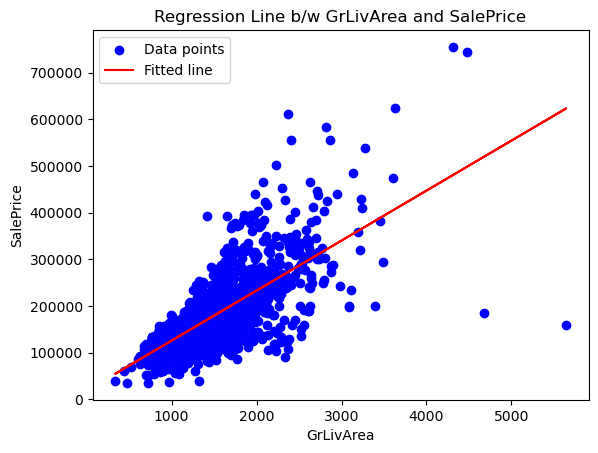

In [113]:
plt.scatter(data['GrLivArea'], data['SalePrice'], color='blue', label='Data points')
plt.plot(data['GrLivArea'], model1.fittedvalues, 'r', label='Fitted line')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Regression Line b/w GrLivArea and SalePrice')
plt.legend()
plt.show()

## Q2

##### Create a regression model between TotalBsmtSF and LotArea (response variable). Show the scatter plot with regression line between them. Discuss the R-squared value. . 

In [117]:
X = sm.add_constant(data['TotalBsmtSF']) 
Y = data['LotArea']
model2 = sm.OLS(Y, X).fit()
print("Task 2 - Model Summary:")
print(model2.summary())

Task 2 - Model Summary:
                            OLS Regression Results                            
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        06:30:21   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    

In [119]:
model2.pvalues

const          1.603215e-10
TotalBsmtSF    3.911258e-24
dtype: float64

##### **^Explanation/Reasoning:** With an R-squared of just 0.068, the regression analysis between `TotalBsmtSF` and `LotArea` demonstrates a statistically significant association, meaning that basement size only accounts for 6.8% of the variation in lot area. The lot area increases by approximately 5.93 square feet for every square foot added to the basement, as indicated by the significant coefficients with an intercept of 4241.6386 and a slope of 5.9344. However, the low R-squared and high Jarque-Bera test value point to poor model fit and possible problems such as non-normality in the residuals.


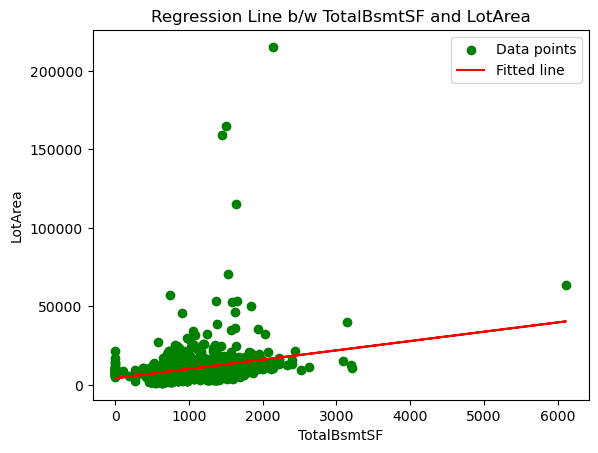

In [122]:
plt.scatter(data['TotalBsmtSF'], data['LotArea'], color='green', label='Data points')
plt.plot(data['TotalBsmtSF'], model2.fittedvalues, 'r', label='Fitted line')
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')
plt.title('Regression Line b/w TotalBsmtSF and LotArea')
plt.legend()
plt.show()

## Q3

##### Calculate Correlation for questions (1) and (2) and explain the correlation value to support your answer for questions (1) and (2). 

In [171]:
corr1 = data['GrLivArea'].corr(data['SalePrice'])
corr2 = data['TotalBsmtSF'].corr(data['LotArea'])
print("Correlation b/w GrLivArea and SalePrice:", corr1)
print("Correlation b/w TotalBsmtSF and LotArea:", corr2)

Correlation b/w GrLivArea and SalePrice: 0.7086244776126522
Correlation b/w TotalBsmtSF and LotArea: 0.2608331345451576


##### **^Explanation/Reasoning:** There is a significant positive association of roughly 0.709 between `GrLivArea` and `SalePrice`. This indicates that a home's sale price typically rises in proportion to its living area, confirming the significance of living area in home pricing models. By comparison, there is a much weaker positive association approximately 0.261 between `TotalBsmtSF` and `LotArea`. This shows that although there is some correlation between the size of the basement and the lot space, it is quite little and suggests that other factors probably have a greater impact on the lot area.


## Q4 

##### Create a regression model to predict SalePrice using all other inputs. Discuss the effectiveness of the model using R-squared value. Report 3 most significant inputs and 3 least significant inputs (based on p-value) and interpret the results. Create one new input of your choice of values and show the prediction of SalePrice using the same model. 

In [669]:
#finding categorical columns since regression cannot happen on categorical columns
data2 = pd.read_csv('HousePricingData.csv')
# data2.dtypes

#removing Id column
if 'Id' in data2.columns:
    data2.drop(['Id'], axis=1, inplace=True)
    
# data2.shape[1]
# data2.columns

non_numeric_cols = data2.select_dtypes(exclude=['int', 'float']).columns.tolist()
non_numeric_cols

['PavedDrive', 'SaleCondition']

In [671]:
categorical_cols = data2.select_dtypes(include=['object']).columns.tolist()
data2 = pd.get_dummies(data2, columns=categorical_cols, dtype='int')
print("Data types after converting to dummies just to ensure:")
print(data2.dtypes)
# data2.shape[1]

Data types after converting to dummies just to ensure:
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
Fireplaces               int64
GarageCars               int64
SalePrice                int64
PavedDrive_N             int32
PavedDrive_P             int32
PavedDrive_Y             int32
SaleCondition_Abnorml    int32
SaleCondition_AdjLand    int32
SaleCondition_Alloca     int32
SaleCondition_Family     int32
SaleCondition_Normal     int32
SaleCondition_Partial    int32
dtype: object


In [673]:
X = data2.drop('SalePrice', axis=1)  
Y = data2['SalePrice']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:52:15   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [675]:
p_values = model.pvalues.sort_values()
print("Most Significant Inputs:")
print(p_values.head(3))
print("\nLeast Significant Inputs:")
print(p_values.tail(3))
# p_values

Most Significant Inputs:
OverallQual              7.800179e-44
GarageCars               6.026648e-13
SaleCondition_Abnorml    1.307567e-12
dtype: float64

Least Significant Inputs:
BsmtHalfBath    0.209027
FullBath        0.405612
HalfBath        0.959057
dtype: float64


##### **^Explanation/Reasoning:** The R-squared value of 0.803 indicates that the model explains about 80.3% of the variance in `SalePrice`, demonstrating a strong and effective fit to the data.
##### My regression model's findings highlight how important some factors are in influencing the price at which houses are sold. The house's overall quality and the garage's capacity both considerably increase the sale price, which is in line with my observations of buyers' preferences for higher quality and more usable space. Furthermore, unusual sale circumstances like foreclosures usually result in a property's sale price being lower, suggesting that buyers anticipate savings in such cases. Less important elements like the number of basement half bathrooms (BsmtHalfBath), full bathrooms (FullBath), and half bathrooms not in the basement (HalfBath) exhibit high p-values, indicating that these characteristics have little to no effect on sale prices. This suggests that these features do not significantly influence buyer decisions in this market.

In [692]:
# creating new input
new_input_data = {
    'const': 1,
    'LotArea': 9500,
    'OverallQual': 7,
    'OverallCond': 5,
    'YearBuilt': 2001,
    'TotalBsmtSF': 1200,
    '1stFlrSF': 1180,
    '2ndFlrSF': 1100,
    'GrLivArea': 2280,
    'BsmtFullBath': 1,
    'BsmtHalfBath': 0,
    'FullBath': 2,
    'HalfBath': 1,
    'BedroomAbvGr': 4,
    'KitchenAbvGr': 1,
    'Fireplaces': 1,
    'GarageCars': 2,
    'PavedDrive_N': 0,
    'PavedDrive_P': 0,
    'PavedDrive_Y': 1,
    'SaleCondition_Abnorml': 0,
    'SaleCondition_AdjLand': 0,
    'SaleCondition_Alloca': 0,
    'SaleCondition_Family': 0,
    'SaleCondition_Normal': 1,
    'SaleCondition_Partial': 0
}

new_input = pd.DataFrame([new_input_data])
new_input
# new_input = sm.add_constant(new_input)
# new_input.shape[1]

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9500,7,5,2001,1200,1180,1100,2280,1,...,2,0,0,1,0,0,0,0,1,0


In [696]:
model.predict(new_input)

0    254705.884524
dtype: float64

###### The predicted `SalePrice` for the given input using this model is 254705


## Q5

#####  Create a regression model to predict LotArea using all other inputs. Discuss the effectiveness of the model using R-squared value. Report 3 most significant inputs and 3 least significant inputs (based on p-value) and interpret the results. Create one new input of your choice of values and show the prediction of LotArea using the same model.del.

In [230]:
#finding categorical columns since regression cannot happen on categorical columns
data3 = pd.read_csv('HousePricingData.csv')
# data3.dtypes

#removing Id column
if 'Id' in data3.columns:
    data3.drop(['Id'], axis=1, inplace=True)
non_numeric_cols = data3.select_dtypes(exclude=['int', 'float']).columns.tolist()
non_numeric_cols
# data3.columns

['PavedDrive', 'SaleCondition']

In [706]:
categorical_cols = data3.select_dtypes(include=['object']).columns.tolist()
data3 = pd.get_dummies(data3, columns=categorical_cols, dtype='int')
print("Data types after converting to dummies just to ensure:")
print(data3.dtypes)
# data3.columns

Data types after converting to dummies just to ensure:
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
Fireplaces               int64
GarageCars               int64
SalePrice                int64
PavedDrive_N             int32
PavedDrive_P             int32
PavedDrive_Y             int32
SaleCondition_Abnorml    int32
SaleCondition_AdjLand    int32
SaleCondition_Alloca     int32
SaleCondition_Family     int32
SaleCondition_Normal     int32
SaleCondition_Partial    int32
dtype: object


In [714]:
X = data3.drop('LotArea', axis=1)  
Y = data3['LotArea']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        16:01:46   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [716]:
p_values = model.pvalues.sort_values()
print("Most Significant Inputs:")
print(p_values.head(3))
print("\nLeast Significant Inputs:")
print(p_values.tail(3))
# p_values

Most Significant Inputs:
OverallQual    4.455178e-09
Fireplaces     1.125990e-06
SalePrice      1.360238e-05
dtype: float64

Least Significant Inputs:
2ndFlrSF       0.537827
GrLivArea      0.734878
OverallCond    0.744641
dtype: float64


##### **^Explanation/Reasoning:**  With an R-squared value of 0.172, the regression model shows a comparatively poor relationship between the input variables and `LotArea`. This suggests that only 17.2% of the variance in lot sizes can be explained by the model. Larger lots are generally associated with higher quality homes that command higher prices and have more amenities, such as fireplaces. This is supported by factors like `OverallQual`, `Fireplaces`, and `SalePrice`. This pattern indicates that buyers favour large rooms in upscale homes. On the other hand, variables such as `FullBath`, `GrLivArea`, and `OverallCond` have little effect on lot size, indicating that the lot's size is determined more by its market position and overall desirability than by the internal features or condition of the house. This reflects buyer priorities and property valuation considerations in the real estate market.


In [708]:
# creating new input
new_input_data = {
    'const': 1,
    'OverallQual': 8,
    'OverallCond': 6,
    'YearBuilt': 1995,
    'TotalBsmtSF': 1200,
    '1stFlrSF': 1250,
    '2ndFlrSF': 850,
    'GrLivArea': 2100,
    'BsmtFullBath': 1,
    'BsmtHalfBath': 1,
    'FullBath': 2,
    'HalfBath': 1,
    'BedroomAbvGr': 4,
    'KitchenAbvGr': 1,
    'Fireplaces': 2,
    'GarageCars': 2,
    'SalePrice': 350000,
    'PavedDrive_N': 0,
    'PavedDrive_P': 0,
    'PavedDrive_Y': 1,
    'SaleCondition_Abnorml': 0,
    'SaleCondition_AdjLand': 0,
    'SaleCondition_Alloca': 0,
    'SaleCondition_Family': 0,
    'SaleCondition_Normal': 1,
    'SaleCondition_Partial': 0
}

new_input = pd.DataFrame([new_input_data])
new_input

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8,6,1995,1200,1250,850,2100,1,1,...,350000,0,0,1,0,0,0,0,1,0


In [710]:
model.predict(new_input)

0    4.417649e+09
dtype: float64

###### The predicted `LotArea` for the given input using this model is 4,417,649,000

## Q6

##### From Question 4, drop/remove all the columns which are not signification (p-value >0.05) and create a new model to predict SalePrice. Discuss the performance of the model using few inputs as compared to using all inputs in (Question 4). Which model do you prefer and why? a. The idea is to create a simple generalized model with fewer inputs which are important for prediction and getting the similar performance. For this concept, please research and study “Regularization in Regression” 

In [585]:
data4 = pd.read_csv('HousePricingData.csv')
if 'Id' in data4.columns:
    data4.drop(['Id'], axis=1, inplace=True)

# data4.shape[1]
# data4.columns

categorical_cols = data4.select_dtypes(include=['object']).columns.tolist()

data4 = pd.get_dummies(data4, columns=categorical_cols, dtype='int')

# Model from Question 4
X_full = data4.drop('SalePrice', axis=1)
Y = data4['SalePrice']
X_full = sm.add_constant(X_full)
model_1 = sm.OLS(Y, X_full).fit()

# Model with few inputs having p-values < 0.05
significant_vars = model_1.pvalues[model_1.pvalues < 0.05].index.tolist()
X_significant = X_full[significant_vars]
model_2 = sm.OLS(Y, X_significant).fit()
# model_2.summary()

In [350]:
# Model with all inputs
print("Model with all inputs (Question 4) Summary:")
print(model_1.summary())

# Model with few inputs
print("\nModel with few inputs Summary:")
print(model_2.summary())

Model with all inputs (Question 4) Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:38:29   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

##### **^Explanation/Reasoning:**  When comparing the two regression models, it can be seen that the model which makes use of all inputs, has an R-squared of 0.803 and accounts for around 80.3% of the variance in `SalePrice`. On the other hand, the R-squared of the reduced model which only incorporates statistically relevant inputs, is 0.753, accounting for 75.3% of the variation. The simplified model is better because of its improved generalisability, less danger of overfitting, and decreased complexity, even though its explanatory power has somewhat decreased. This simplified method preserves a high level of predicted accuracy while also increasing the model's interpretability and efficiency, which makes it more useful for real estate valuation applications in the real world.


## Q7

##### Using the model in Question 6, create 3 new data records and predict their SalePrice. Discuss if the predicted output looks good and make sense..

In [723]:
# creating new data
new_input_data = {
    'const': [1, 1, 1],
    'LotArea': [9500, 12000, 8500],
    'OverallQual': [7, 8, 6],
    'OverallCond': [5, 7, 4],
    'YearBuilt': [2001, 1995, 2010],
    'TotalBsmtSF': [1200, 1500, 1100],
    '1stFlrSF': [1180, 1400, 1000],
    '2ndFlrSF': [1100, 1200, 800],
    'GrLivArea': [2280, 2600, 1800],
    'BsmtFullBath': [1, 2, 1],
    'BsmtHalfBath': [0, 0, 1],
    'FullBath': [2, 3, 1],
    'HalfBath': [1, 1, 0],
    'BedroomAbvGr': [4, 5, 3],
    'KitchenAbvGr': [1, 1, 1],
    'Fireplaces': [1, 2, 0],
    'GarageCars': [2, 3, 1],
    'PavedDrive_N': [0, 0, 1],
    'PavedDrive_P': [0, 1, 0],
    'PavedDrive_Y': [1, 0, 0],
    'SaleCondition_Abnorml': [0, 0, 1],
    'SaleCondition_AdjLand': [0, 1, 0],
    'SaleCondition_Alloca': [0, 0, 0],
    'SaleCondition_Family': [0, 0, 0],
    'SaleCondition_Normal': [1, 0, 0],
    'SaleCondition_Partial': [0, 0, 0]
}

new_input = pd.DataFrame(new_input_data)
new_input

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9500,7,5,2001,1200,1180,1100,2280,1,...,2,0,0,1,0,0,0,0,1,0
1,1,12000,8,7,1995,1500,1400,1200,2600,2,...,3,0,1,0,0,1,0,0,0,0
2,1,8500,6,4,2010,1100,1000,800,1800,1,...,1,1,0,0,1,0,0,0,0,0


In [731]:
new_input_filtered = new_input[significant_vars]

In [733]:
model_2.predict(new_input_filtered)

0    236969.567892
1    341470.057860
2    163111.353248
dtype: float64

###### The predicted `SalePrice` for the three records are approximately 236,699.57, 341,470.06, and 163,111.35, respectively, reflecting the differences in property features.